In [4]:
import h5py
import numpy as np
from numpy import square as sqr
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import deepcopy
import sys
from pathlib import Path
sys.path.append(Path("~/projects/foxlink/foxlink"))
#from stylelib.ase1_styles import ase1_runs_stl, ase1_sims_stl
#plt.style.use(ase1_sims_stl)
#from ../foxlink/FP_pass_para_CN import FPPassiveParaCNSolver
#from FP_initial_conditions import *

In [43]:
def graph_vs_time(ax, time, y, n=-1, color='b'):
    s = ax.plot(time[:n], y[:n], c=color)
    return s

In [44]:
def sum_xl_num(h5_data):
    xl_distr = h5_data['/XL_data/XL_distr']
    ds = h5_data.attrs['ds']
    return np.sum(xl_distr, axis=(0, 1))*(ds**2)

Text(0, 0.5, 'Number of crosslinks at 20 seconds')

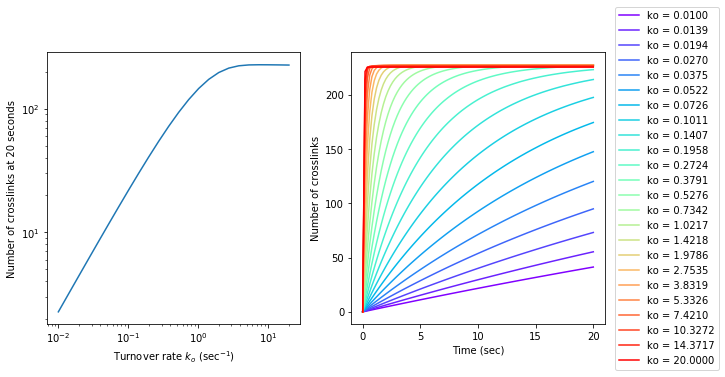

In [61]:
fig, axarr = plt.subplots(1,2, figsize=(10,5))
ko_scan_path = Path("/Users/adamlamson/projects/DATA/XlinkProb/testing/FP_GenOrient_StaticXlinks_tests/19-06-22_GO24_para_ko0.01-20.0")
ko_h5_paths = list(ko_scan_path.glob('**/*.h5'))
h5_files = sorted([h5py.File(kop) for kop in ko_h5_paths], key=lambda x: x.attrs['ko'])
colors = mpl.cm.rainbow(np.linspace(0,1.,num=len(h5_files)))
N_end_arr = []
t = hf['time']
for hf, c in zip(h5_files, colors):
    Nxl_arr = sum_xl_num(hf)
    #graph_vs_time(ax, hf['time'], Nxl_arr[:-1],color=c)
    N_end_arr += [Nxl_arr[int(t.size/20.)]]
    axarr[1].plot(t, Nxl_arr[:-1], c=c, label='ko = {:.4f}'.format(hf.attrs['ko']))
axarr[1].legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
axarr[1].set_xlabel("Time (sec)")
axarr[1].set_ylabel("Number of crosslinks")
axarr[0].loglog([ko.attrs['ko'] for ko in h5_files], N_end_arr)
axarr[0].set_xlabel("Turnover rate $k_o$ (sec$^{-1}$)")
axarr[0].set_ylabel("Number of crosslinks at 1 second")
    

In [51]:
for hf in h5_files:
    hf.close()